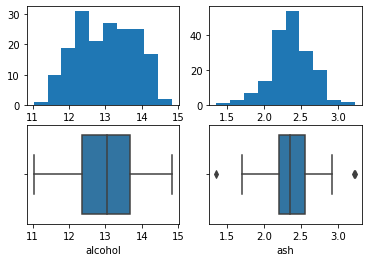

In [2]:
#Part 1 

import pandas as pd
import numpy as np
from sklearn import preprocessing as pre
from sklearn.datasets import load_wine
import seaborn as sns 
import matplotlib.pyplot as plt

data = load_wine()
df = pd.DataFrame(data.data,columns=data.feature_names)

plt.subplot(221)
plt.hist(df['alcohol'], bins = 10)
plt.subplot(223)
sns.boxplot(df['alcohol'])

plt.subplot(222)
plt.hist(df['ash'], bins = 10)
plt.subplot(224)
sns.boxplot(df['ash'])


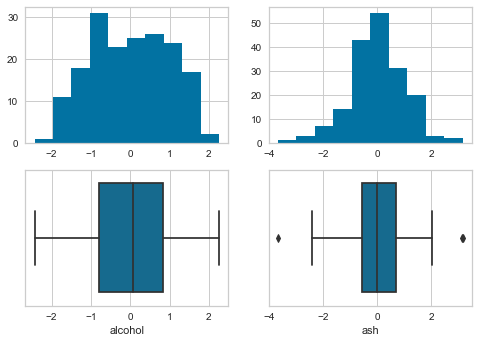

In [13]:
#Standardized Data

standard = pre.StandardScaler()
data.data = standard.fit_transform(data.data)
df = pd.DataFrame(data.data, columns=data.feature_names)

plt.subplot(221)
plt.hist(df['alcohol'], bins = 10)
plt.subplot(223)
sns.boxplot(df['alcohol'])
plt.xlabel = 'Alcohol'

plt.subplot(222)
plt.hist(df['ash'], bins = 10)
plt.subplot(224)
sns.boxplot(df['ash'])
plt.xlabel = 'Ash'



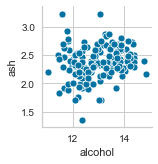

In [14]:
#Pairplot
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
sns.pairplot(df, x_vars = "alcohol", y_vars = "ash")

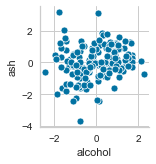

In [15]:
#Standardized Pairplot

standard = pre.StandardScaler()
data.data = standard.fit_transform(data.data)
df = pd.DataFrame(data.data, columns=data.feature_names)
sns.pairplot(df, x_vars = "alcohol", y_vars = "ash")

In [3]:
# Histogram for all the attribute values across all attributes
data = load_wine()
df = pd.DataFrame(data)
plt.hist(df,bins = 10)

ValueError: arrays must all be same length

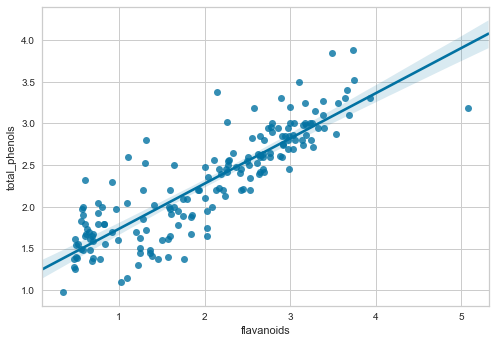

In [17]:
#Part 2
# 2 attributes that look like they have a good linear relationship

sns.regplot(x = 'flavanoids', y = 'total_phenols', data = df)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot


x = pd.DataFrame(df['flavanoids']).to_numpy()
y = pd.DataFrame(df['total_phenols']).to_numpy()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
print("R2 Score: " + str(regr.score(x_test,y_test)))
print("Y intercept: " + str(regr.intercept_))

R2 Score: 0.7389586609007448
Y intercept: [1.15060793]


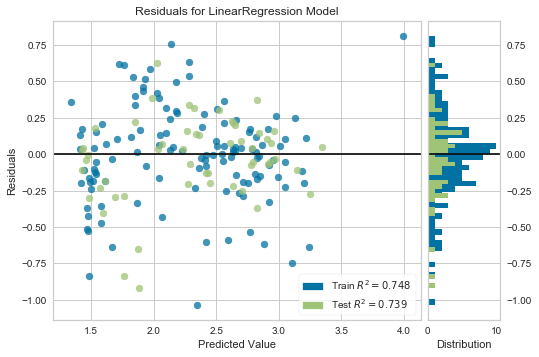

In [19]:
# Residual Plot
regr = LinearRegression()
visualizer = ResidualsPlot(regr)
visualizer.fit(x_train,y_train)
visualizer.score(x_test, y_test)
visualizer.show()  

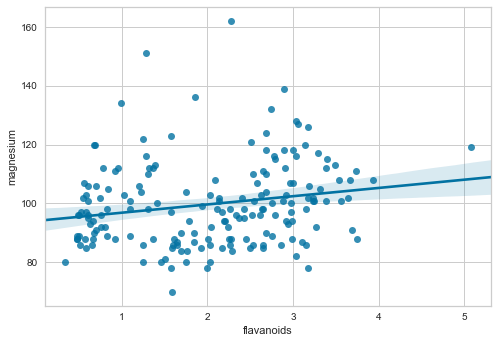

In [20]:
# 2 attributes that don’t look like they have a linear relationship

sns.regplot(x = 'flavanoids', y = 'magnesium', data = df)

In [21]:
x = pd.DataFrame(df['flavanoids']).to_numpy()
y = pd.DataFrame(df['magnesium']).to_numpy()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)
regr = LinearRegression()
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
print("R2 Score: " + str(regr.score(x_test,y_test)))
print("Y intercept: " + str(regr.intercept_))

R2 Score: -0.10349013362930704
Y intercept: [94.54936123]


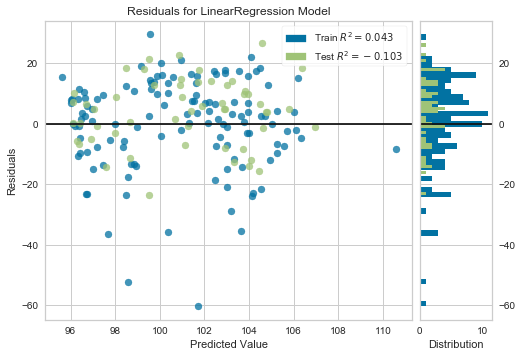

In [22]:
# Residual Plot

regr = LinearRegression()
visualizer = ResidualsPlot(regr)
visualizer.fit(x_train,y_train)
visualizer.score(x_test, y_test)
visualizer.show()  